In [1]:
from tesser import util
from tesser import fit
from tesser import network
from tesser import sr
from tesser import rsa
from tesser import network
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
#anytime you make a figure, it'll show up, and can make subplots

#if laptop:
#data_dir = '/Users/athulapudhiyidath/Dropbox/Experiments/tesser_successor/data'

#if work:
data_dir = '/Users/athula/Dropbox/Experiments/tesser_successor/data'

subject = 135

# load structure learning and induction data for one subject
group_load = util.load_group(data_dir, subject)
df_group = pd.DataFrame(group_load)
df_group.columns = np.arange(len(df_group.columns))
df_group

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,12.0,15.0,13.0,0.0,0.0,9.0,7.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,17.0,16.0,11.0,0.0,0.0,0.0,10.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,19.0,3.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,20.0,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
#find the coordinates of each of the numbers
#save the number + respective coordinates (row, col) into a array

all_num = []
all_row = []
all_col = []
for n in range(1, 22, 1):
    this_row_col = np.where(df_group == n) #row [0], column [1]
    this_row = np.int(this_row_col[0])
    this_col = np.int(this_row_col[1])
    all_num.append(n)
    all_row.append(this_row)
    all_col.append(this_col)
    
    
all_num_row_col = pd.DataFrame(list(zip(all_num, all_row, all_col)), columns=['node', 'row', 'col'])
print(all_num_row_col)

all_row_col = pd.DataFrame(list(zip(all_row, all_col)), columns=['row', 'col'])
print(all_row_col)

    node  row  col
0      1    5    7
1      2    6    7
2      3    5    6
3      4    2    8
4      5    2    9
5      6    1    9
6      7    1    7
7      8    1    8
8      9    1    6
9     10    2    7
10    11    2    3
11    12    1    1
12    13    1    3
13    14    3    1
14    15    1    2
15    16    2    2
16    17    2    1
17    18    5    8
18    19    5    5
19    20    6    5
20    21    6    6
    row  col
0     5    7
1     6    7
2     5    6
3     2    8
4     2    9
5     1    9
6     1    7
7     1    8
8     1    6
9     2    7
10    2    3
11    1    1
12    1    3
13    3    1
14    1    2
15    2    2
16    2    1
17    5    8
18    5    5
19    6    5
20    6    6


[[5 7]
 [6 7]
 [5 6]
 [2 8]
 [2 9]
 [1 9]
 [1 7]
 [1 8]
 [1 6]
 [2 7]
 [2 3]
 [1 1]
 [1 3]
 [3 1]
 [1 2]
 [2 2]
 [2 1]
 [5 8]
 [5 5]
 [6 5]
 [6 6]]


array([[       nan, 1.        , 1.        , 3.16227766, 3.60555128,
        4.47213595, 4.        , 4.12310563, 4.12310563, 3.        ,
        5.        , 7.21110255, 5.65685425, 6.32455532, 6.40312424,
        5.83095189, 6.70820393, 1.        , 2.        , 2.23606798,
        1.41421356],
       [       nan,        nan, 1.41421356, 4.12310563, 4.47213595,
        5.38516481, 5.        , 5.09901951, 5.09901951, 4.        ,
        5.65685425, 7.81024968, 6.40312424, 6.70820393, 7.07106781,
        6.40312424, 7.21110255, 1.41421356, 2.23606798, 2.        ,
        1.        ],
       [       nan,        nan,        nan, 3.60555128, 4.24264069,
        5.        , 4.12310563, 4.47213595, 4.        , 3.16227766,
        4.24264069, 6.40312424, 5.        , 5.38516481, 5.65685425,
        5.        , 5.83095189, 2.        , 1.        , 1.41421356,
        1.        ],
       [       nan,        nan,        nan,        nan, 1.        ,
        1.41421356, 1.41421356, 1.        , 2.2360679

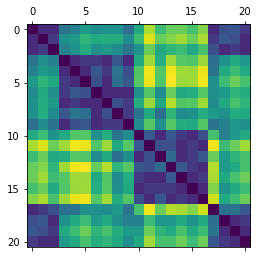

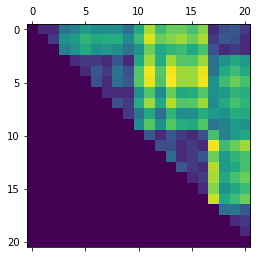

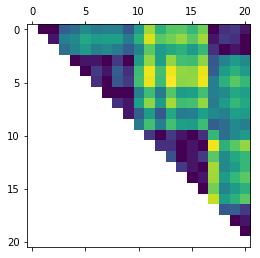

In [3]:
all_row_col_array = all_row_col.values
print(all_row_col_array)

dist_bw_sq = squareform(pdist(all_row_col_array, "euclidean"))
plt.matshow(dist_bw_sq)
dist_bw_sq

#get only the upper half, excluding diagonal (b/c the same above and below diagonal)
dist_upper = np.triu(dist_bw_sq)
plt.matshow(dist_upper)

#add in NaNs next
dist_upper[np.tril_indices(dist_upper.shape[0], 0)] = np.nan
plt.matshow(dist_upper)
dist_upper

In [4]:
dist_bw_sq

array([[0.        , 1.        , 1.        , 3.16227766, 3.60555128,
        4.47213595, 4.        , 4.12310563, 4.12310563, 3.        ,
        5.        , 7.21110255, 5.65685425, 6.32455532, 6.40312424,
        5.83095189, 6.70820393, 1.        , 2.        , 2.23606798,
        1.41421356],
       [1.        , 0.        , 1.41421356, 4.12310563, 4.47213595,
        5.38516481, 5.        , 5.09901951, 5.09901951, 4.        ,
        5.65685425, 7.81024968, 6.40312424, 6.70820393, 7.07106781,
        6.40312424, 7.21110255, 1.41421356, 2.23606798, 2.        ,
        1.        ],
       [1.        , 1.41421356, 0.        , 3.60555128, 4.24264069,
        5.        , 4.12310563, 4.47213595, 4.        , 3.16227766,
        4.24264069, 6.40312424, 5.        , 5.38516481, 5.65685425,
        5.        , 5.83095189, 2.        , 1.        , 1.41421356,
        1.        ],
       [3.16227766, 4.12310563, 3.60555128, 0.        , 1.        ,
        1.41421356, 1.41421356, 1.        , 2.2360679

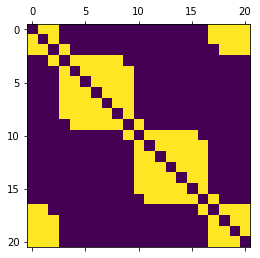

[[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


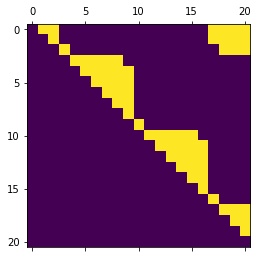

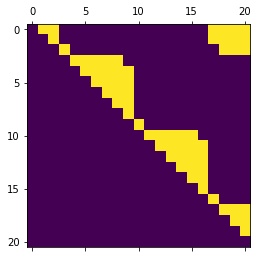

In [5]:
comm_struct = network.node_info()
#print(comm_struct)

#now create an adjacency matrix basd on the relationships b/w items
#can use this adjacency matrix to create a mask to cover the distance above 
adj = network.adjacency(comm_struct)
plt.matshow(adj)
plt.show()
#print(adj)

#get only the upper half, excluding diagonal (b/c the same above and below diagonal)
adj_upper = np.triu(adj)
plt.matshow(adj_upper)
#print(adj_upper)

#add in 7 for the diagonal that does not matter, b/c rest will be using 1 and 0 for (within and across) 
adj_upper[np.tril_indices(adj_upper.shape[0], 0)] = .01
plt.matshow(adj_upper)
print(adj_upper)

1.761082381539765
5.365689879246522


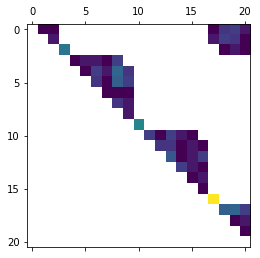

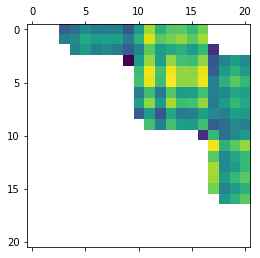

In [6]:
#now to calculate the distances whose adj_upper == 1 (within) and adj_upper == 0 (across)
#within
adj_within_dist = np.ma.masked_where(adj_upper == 0, dist_upper)
plt.matshow(adj_within_dist)

#now to take the mean of the distances
within_avg_dist = np.nanmean(adj_within_dist)
print(within_avg_dist)

#across
adj_across_dist = np.ma.masked_where(adj_upper == 1, dist_upper)
plt.matshow(adj_across_dist)

#now to take the mean of the distances
across_avg_dist = np.nanmean(adj_across_dist)
print(across_avg_dist)

In [8]:
adj_within_dist

masked_array(
  data=[[--, 1.0, 1.0, --, --, --, --, --, --, --, --, --, --, --, --,
         --, --, 1.0, 2.0, 2.23606797749979, 1.4142135623730951],
        [--, --, 1.4142135623730951, --, --, --, --, --, --, --, --, --,
         --, --, --, --, --, 1.4142135623730951, 2.23606797749979, 2.0,
         1.0],
        [--, --, --, 3.605551275463989, --, --, --, --, --, --, --, --,
         --, --, --, --, --, --, 1.0, 1.4142135623730951, 1.0],
        [--, --, --, --, 1.0, 1.4142135623730951, 1.4142135623730951,
         1.0, 2.23606797749979, --, --, --, --, --, --, --, --, --, --,
         --, --],
        [--, --, --, --, --, 1.0, 2.23606797749979, 1.4142135623730951,
         3.1622776601683795, 2.0, --, --, --, --, --, --, --, --, --, --,
         --],
        [--, --, --, --, --, --, 2.0, 1.0, 3.0, 2.23606797749979, --, --,
         --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, 1.0, 1.0, 1.0, --, --, --, --, --,
         --, --, --, --, --, --],
       